# NOTE

# IMPORTS

In [1]:
# Architecture
from keras import layers
from keras import models
from keras.preprocessing.image import load_img
from keras import backend as K
from keras.utils import plot_model

# Automatic Downloads
import numpy as np
import requests
import time
import os

# Image labeling
import cv2
import imutils
from imutils import paths

Using TensorFlow backend.


# HELPER

# DATASET

## Download Captcha

In [13]:
url = 'https://www.e-zpassny.com/vector/jcaptcha.do'
total = 0
num_images = 2
output_path = 'C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Case Studi/Captcha/output'

# Loop over the number of images to download 
for i in np.arange(0, num_images):
    try:
        # Grab a new captcha image
        r = requests.get(url, timeout=60)
        
        # save the image to disk
        p = os.path.sep.join([output_path, '{}.do'.format(str(total).zfill(5))])
        f = open(p, 'wb')
        f.write(r.content)
        f.close()
        
        # update the counter
        print('[INFO] downloaded: {}'.format(p))
        total += 1
    except:
        print('[INFO] error downloading image...')
    
    # introduce a small time sleep
    time.sleep(0.1)

# r = requests.get(url, timeout=60)
# print(r.content)

[INFO] downloaded: C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Case Studi/Captcha/output\00000.do
[INFO] downloaded: C:/Users/Tajr/Desktop/Data/RadonPlus/RadonTechnology/Dev/Case Studi/Captcha/output\00001.do


## Labeling

In [12]:
image_paths = list(paths.list_images(output_path))
counts = {}

for(i, image_path) in enumerate(image_paths):
    print('[INFO] processing image {}/{}'.format(str(i + 1), len(image_paths)))
    
    
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.copyMakeBorder(gray, 8, 8, 8, 8, cv2.BORDER_REPLICATE)
    cv2.imshow('imagwi',gray)
    cv2.waitKey(0)


[INFO] processing image 1/3
[INFO] processing image 2/3
[INFO] processing image 3/3


# ARCHITECTURE

## Variables

In [8]:
width = 28
height = 28
depth = 1
classes = 10
input_shape = (width, height, depth)

if K.image_data_format == 'channels_first':
    input_shape = (depth, width, height)

## Model Definition

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(20, (5, 5) ,padding='same', input_shape=input_shape))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Conv2D(50, (5, 5), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(500))
model.add(layers.Activation('relu'))
model.add(layers.Dense(classes))
model.add(layers.Activation('softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
activation_9 (Activation)    (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_10 (Activation)   (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 2450)             

## Model Visualization

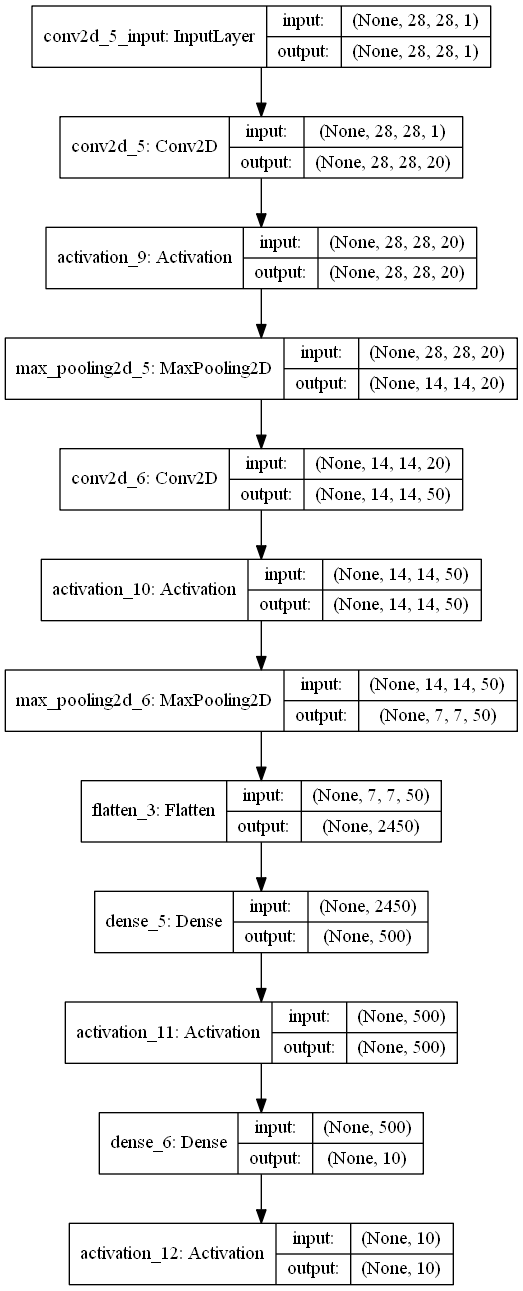

In [13]:
seriarize_to = ''
plot_model(model, to_file='serialized/model_architecture.png', show_shapes=True)

# COMPILATION

# TRAINING

# PLOTTING

# EVALUATION

# PREDICTIONS